In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv('divorce_data.csv', delimiter=';')

In [3]:
data.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Divorce
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


In [4]:
data.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Divorce
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,...,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,1.776471,1.652941,1.764706,1.482353,1.541176,0.747059,0.494118,1.452941,1.458824,1.576471,...,2.552941,2.270588,2.741176,2.382353,2.429412,2.476471,2.517647,2.241176,2.011765,0.494118
std,1.627257,1.468654,1.415444,1.504327,1.632169,0.904046,0.898698,1.546371,1.557976,1.421529,...,1.371786,1.586841,1.137348,1.511587,1.405090,1.260238,1.476537,1.505634,1.667611,0.501442
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000
50%,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000,0.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000


In [5]:
data.isnull().sum()

Q1         0
Q2         0
Q3         0
Q4         0
Q5         0
Q6         0
Q7         0
Q8         0
Q9         0
Q10        0
Q11        0
Q12        0
Q13        0
Q14        0
Q15        0
Q16        0
Q17        0
Q18        0
Q19        0
Q20        0
Q21        0
Q22        0
Q23        0
Q24        0
Q25        0
Q26        0
Q27        0
Q28        0
Q29        0
Q30        0
Q31        0
Q32        0
Q33        0
Q34        0
Q35        0
Q36        0
Q37        0
Q38        0
Q39        0
Q40        0
Q41        0
Q42        0
Q43        0
Q44        0
Q45        0
Q46        0
Q47        0
Q48        0
Q49        0
Q50        0
Q51        0
Q52        0
Q53        0
Q54        0
Divorce    0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 55 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Q1       170 non-null    int64
 1   Q2       170 non-null    int64
 2   Q3       170 non-null    int64
 3   Q4       170 non-null    int64
 4   Q5       170 non-null    int64
 5   Q6       170 non-null    int64
 6   Q7       170 non-null    int64
 7   Q8       170 non-null    int64
 8   Q9       170 non-null    int64
 9   Q10      170 non-null    int64
 10  Q11      170 non-null    int64
 11  Q12      170 non-null    int64
 12  Q13      170 non-null    int64
 13  Q14      170 non-null    int64
 14  Q15      170 non-null    int64
 15  Q16      170 non-null    int64
 16  Q17      170 non-null    int64
 17  Q18      170 non-null    int64
 18  Q19      170 non-null    int64
 19  Q20      170 non-null    int64
 20  Q21      170 non-null    int64
 21  Q22      170 non-null    int64
 22  Q23      170 non-null    i

In [7]:
# Training Model

In [8]:
y = data['Divorce'].copy()
X = data.drop('Divorce', axis=1).copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

In [9]:
X_train

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q45,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54
12,3,4,3,4,3,0,1,4,3,4,...,4,4,4,4,4,4,4,4,4,4
150,0,3,2,0,0,0,0,0,0,0,...,4,4,4,3,1,1,1,2,0,1
149,0,1,0,0,0,0,0,0,0,0,...,4,4,4,4,4,2,2,0,0,0
28,3,4,3,2,3,0,1,4,3,2,...,4,4,4,4,4,4,4,4,4,4
156,0,0,1,1,0,0,0,0,0,2,...,0,2,1,2,1,2,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,1,2,0,0,0,0,0,0,0,0,...,0,2,1,2,2,2,2,2,1,0
137,0,0,1,0,0,0,0,1,1,0,...,3,3,3,3,0,1,3,3,3,1
72,3,3,3,3,3,1,1,3,3,3,...,3,3,3,3,3,3,3,3,3,3
140,0,2,0,0,0,1,0,0,0,0,...,1,1,2,2,1,0,1,3,2,2


In [10]:
X_train.shape

(118, 54)

In [11]:
y_train

12     1
150    0
149    0
28     1
156    0
      ..
133    0
137    0
72     1
140    0
37     1
Name: Divorce, Length: 118, dtype: int64

In [12]:
model = LogisticRegression()
model.fit(X_train, y_train)

print("Test Accuracy: {:.2f}%".format(model.score(X_test, y_test) * 100))

Test Accuracy: 96.15%


In [13]:
# Using PCA

In [14]:
X_train

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q45,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54
12,3,4,3,4,3,0,1,4,3,4,...,4,4,4,4,4,4,4,4,4,4
150,0,3,2,0,0,0,0,0,0,0,...,4,4,4,3,1,1,1,2,0,1
149,0,1,0,0,0,0,0,0,0,0,...,4,4,4,4,4,2,2,0,0,0
28,3,4,3,2,3,0,1,4,3,2,...,4,4,4,4,4,4,4,4,4,4
156,0,0,1,1,0,0,0,0,0,2,...,0,2,1,2,1,2,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,1,2,0,0,0,0,0,0,0,0,...,0,2,1,2,2,2,2,2,1,0
137,0,0,1,0,0,0,0,1,1,0,...,3,3,3,3,0,1,3,3,3,1
72,3,3,3,3,3,1,1,3,3,3,...,3,3,3,3,3,3,3,3,3,3
140,0,2,0,0,0,1,0,0,0,0,...,1,1,2,2,1,0,1,3,2,2


In [15]:
n_components = 8

pca = PCA(n_components=n_components)
pca.fit(X_train)

X_train_reduced = pd.DataFrame(pca.transform(X_train), index=X_train.index, columns=["PC" + str(i) for i in range(1, n_components + 1)])
X_test_reduced = pd.DataFrame(pca.transform(X_test), index=X_test.index, columns=["PC" + str(i) for i in range(1, n_components + 1)])

In [16]:
X_train_reduced

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
12,14.066466,-0.065186,-0.810092,1.391413,0.603331,-1.032619,-1.856151,-0.928209
150,-8.582718,-3.543475,-2.860693,-0.718076,0.227951,-0.035169,-2.338792,-1.715401
149,-8.548589,-4.145983,-4.055091,-2.128593,2.438771,0.097365,-0.728773,1.263579
28,12.748873,-1.135939,-0.047615,1.160251,0.003013,-1.158083,-2.667211,0.338645
156,-7.870086,1.805395,0.221772,-1.231504,0.141632,-1.062326,-0.063183,-1.393429
...,...,...,...,...,...,...,...,...
133,-8.495490,0.508305,0.541573,1.314817,1.032915,-1.834335,0.609724,0.437751
137,-8.845278,-2.717350,0.367302,1.781332,-0.159814,1.269320,-1.127132,-1.365665
72,9.032262,1.283010,-1.104992,1.114686,0.073987,-0.099858,0.305795,-0.213731
140,-8.453574,-0.518549,0.465545,1.019478,-1.699143,-0.461717,-1.131805,-0.269720


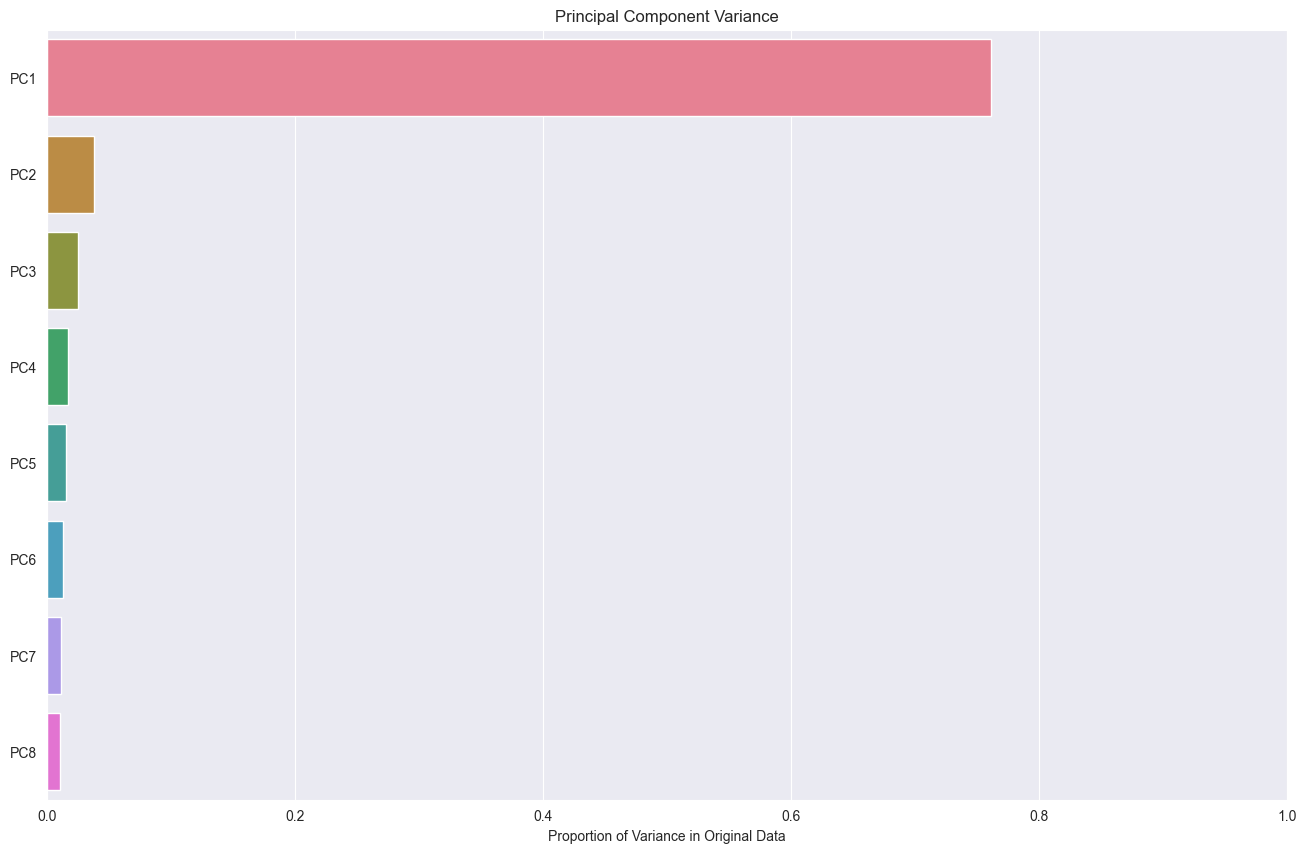

In [17]:
plt.figure(figsize=(16, 10))
sns.barplot(x=pca.explained_variance_ratio_, y=["PC" + str(i) for i in range(1, n_components + 1)], orient='h', palette='husl')
plt.xlim(0., 1.)
plt.xlabel("Proportion of Variance in Original Data")
plt.title("Principal Component Variance")
plt.show()

In [18]:
reduced_model = LogisticRegression()
reduced_model.fit(X_train_reduced, y_train)

print("Test Accuracy ({} Components): {:.2f}%".format(n_components, reduced_model.score(X_test_reduced, y_test) * 100))

Test Accuracy (8 Components): 96.15%


In [19]:
# Using PCA for visualization

In [20]:
n_components = 2

pca = PCA(n_components=n_components)
pca.fit(X_train)

X_train_reduced = pd.DataFrame(pca.transform(X_train), index=X_train.index, columns=["PC" + str(i) for i in range(1, n_components + 1)])
X_test_reduced = pd.DataFrame(pca.transform(X_test), index=X_test.index, columns=["PC" + str(i) for i in range(1, n_components + 1)])

In [21]:
X_train_reduced

,PC1,PC2
12,14.066466,-0.065186
150,-8.582718,-3.543475
149,-8.548589,-4.145983
28,12.748873,-1.135939
156,-7.870086,1.805395
...,...,...
133,-8.495490,0.508305
137,-8.845278,-2.717350
72,9.032262,1.283010
140,-8.453574,-0.518549


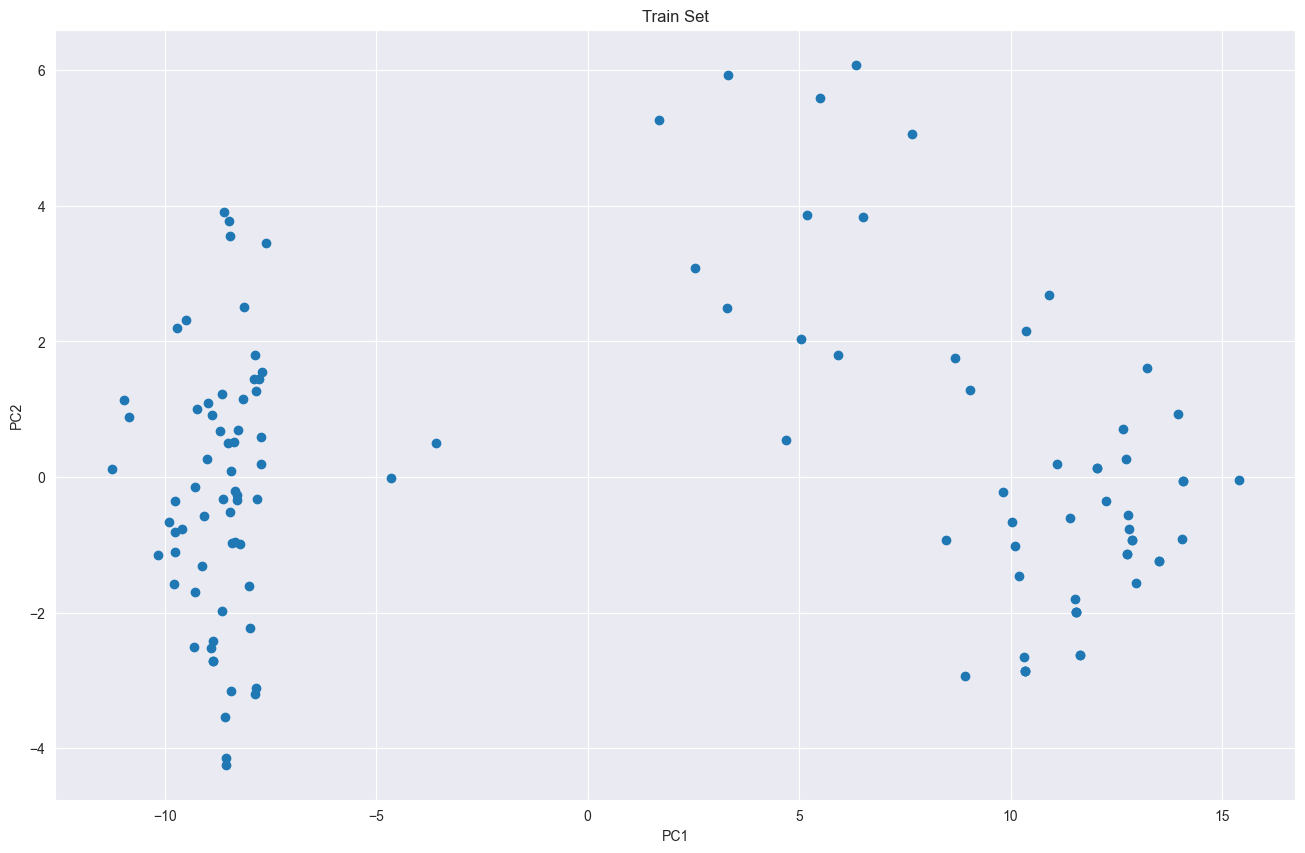

In [22]:
plt.figure(figsize=(16, 10))
plt.scatter(X_train_reduced['PC1'], X_train_reduced['PC2'])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Train Set")
plt.show()

In [23]:
X_train_reduced.loc[y_train == 0, 'PC2']

150   -3.543475
149   -4.145983
156    1.805395
130    0.084000
110   -0.580768
         ...   
129   -2.419276
144    0.700210
133    0.508305
137   -2.717350
140   -0.518549
Name: PC2, Length: 62, dtype: float64

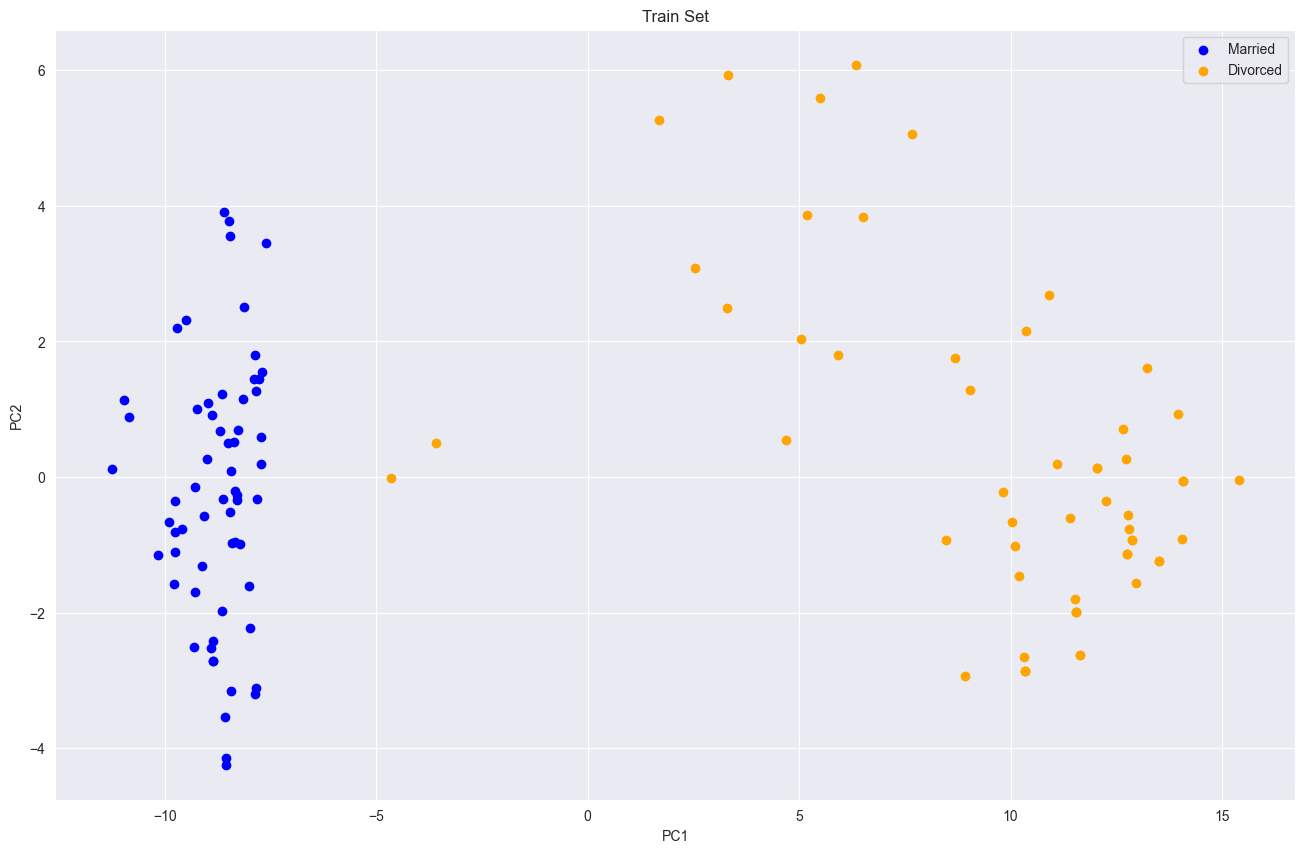

In [24]:
plt.figure(figsize=(16, 10))
plt.scatter(X_train_reduced.loc[y_train == 0, 'PC1'], X_train_reduced.loc[y_train == 0, 'PC2'], label="Married", color='blue')
plt.scatter(X_train_reduced.loc[y_train == 1, 'PC1'], X_train_reduced.loc[y_train == 1, 'PC2'], label="Divorced", color='orange')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Train Set")
plt.legend()
plt.show()

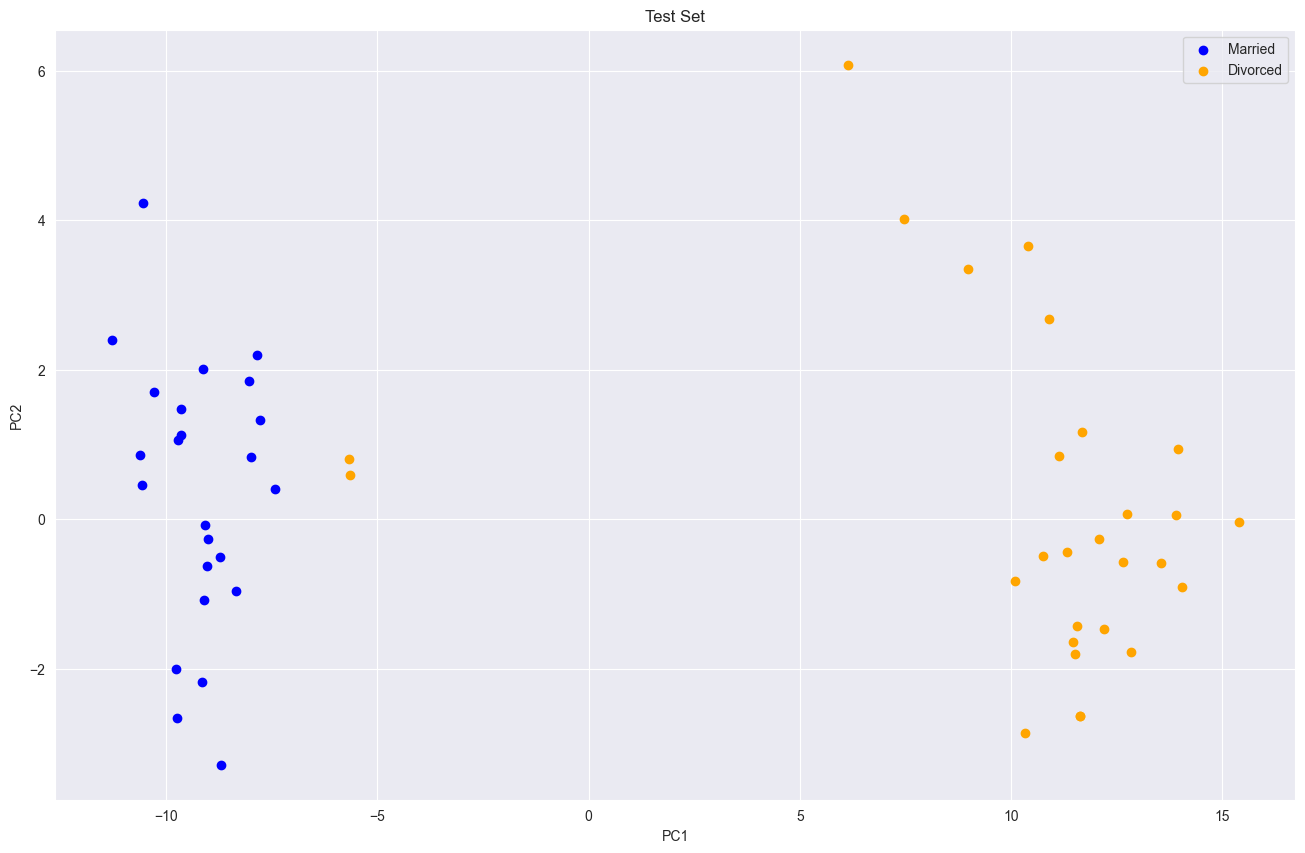

In [25]:
plt.figure(figsize=(16, 10))
plt.scatter(X_test_reduced.loc[y_test == 0, 'PC1'], X_test_reduced.loc[y_test == 0, 'PC2'], label="Married", color='blue')
plt.scatter(X_test_reduced.loc[y_test == 1, 'PC1'], X_test_reduced.loc[y_test == 1, 'PC2'], label="Divorced", color='orange')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Test Set")
plt.legend()
plt.show()

In [26]:
reduced_model = LogisticRegression()
reduced_model.fit(X_train_reduced, y_train)

print("Test Accuracy ({} Components): {:.2f}%".format(n_components, reduced_model.score(X_test_reduced, y_test) * 100))

Test Accuracy (2 Components): 96.15%


In [27]:
misclassifications = X_test_reduced.loc[reduced_model.predict(X_test_reduced) != y_test, :]
misclassifications

,PC1,PC2
4,-5.637804,0.597580
5,-5.674198,0.800159


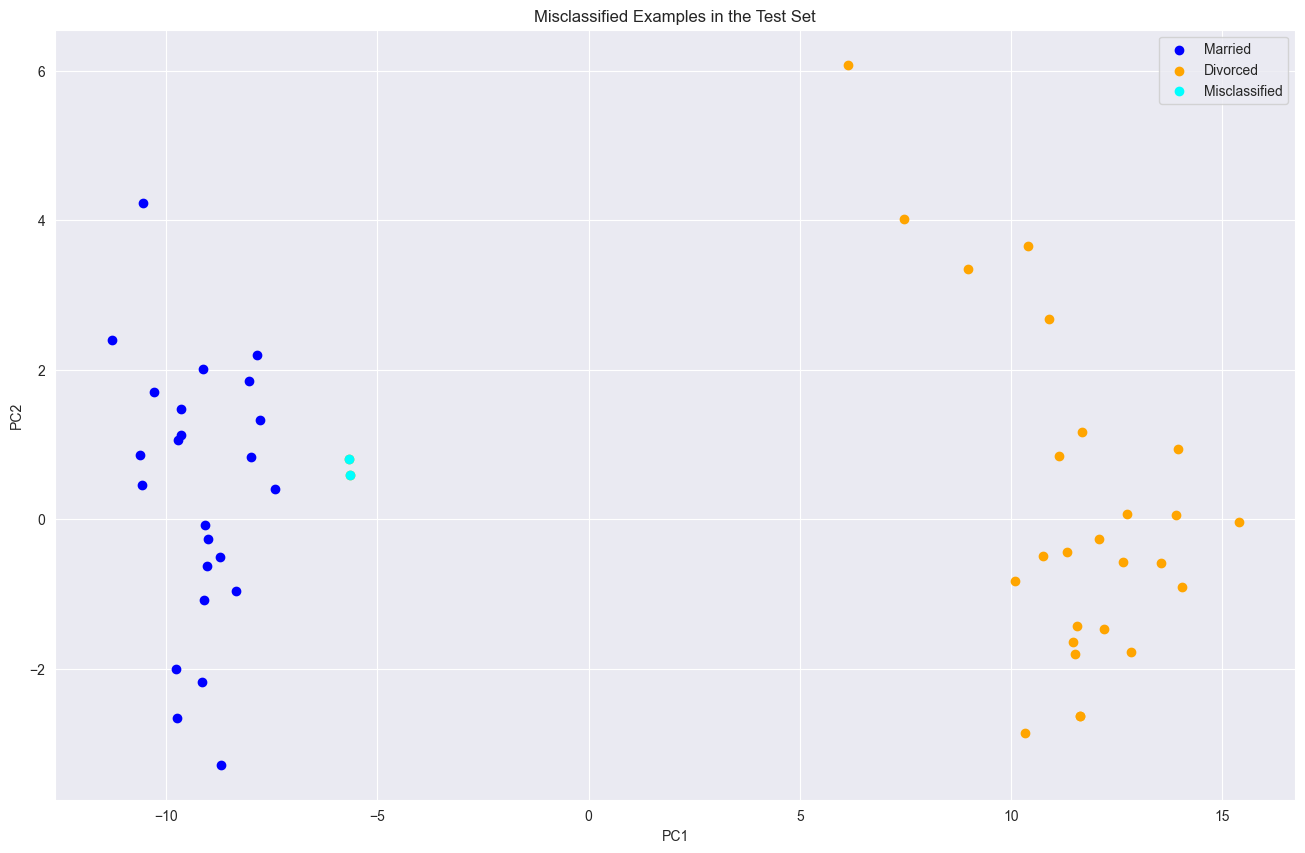

In [28]:
plt.figure(figsize=(16, 10))
plt.scatter(X_test_reduced.loc[y_test == 0, 'PC1'], X_test_reduced.loc[y_test == 0, 'PC2'], label="Married", color='blue')
plt.scatter(X_test_reduced.loc[y_test == 1, 'PC1'], X_test_reduced.loc[y_test == 1, 'PC2'], label="Divorced", color='orange')
plt.scatter(misclassifications['PC1'], misclassifications['PC2'], label="Misclassified", color='cyan')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Misclassified Examples in the Test Set")
plt.legend()
plt.show()